LANDSLIDES PREDICTION

In [1]:
import openeo
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.patches as mpatches

In [2]:
connection = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


In [3]:
spatial_extent = {"west": 80.499, "south": 16.474, "east": 80.670, "north": 16.598}

In [4]:
s2pre = connection.load_collection(
    "SENTINEL2_L2A",
    temporal_extent=["2022-08-25", "2022-11-25"],
    spatial_extent=spatial_extent,
    bands=["B04", "B08"],
)

In [5]:
prendvi = s2pre.ndvi().mean_time()

In [6]:
s2post = connection.load_collection(
    "SENTINEL2_L2A",
    temporal_extent=["2022-11-26", "2022-12-25"],
    spatial_extent=spatial_extent,
    bands=["B04", "B08"],
)

In [7]:
# calculate post NDVI and take a mean over temporal extent
postndvi = s2post.ndvi().mean_time()

In [8]:
# calculate difference in NDVI
diff = postndvi - prendvi

In [9]:
# lets execute the process
diff.download("NDVIDiff.tiff")

In [10]:
# load the calculated data
img = rasterio.open("NDVIDiff.tiff")

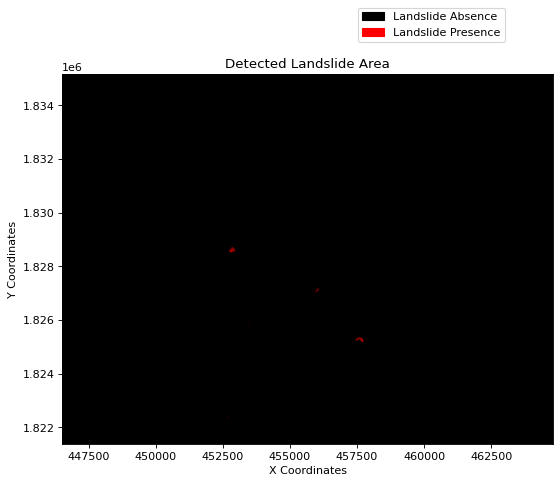

In [11]:
value = img.read(1)
cmap = matplotlib.colors.ListedColormap(["black", "red"])
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
im = show(
    ((value < -0.48) & (value > -1)),
    vmin=0,
    vmax=1,
    cmap=cmap,
    transform=img.transform,
    ax=ax,
)
values = ["Absence", "Presence"]
colors = ["black", "red"]
ax.set_title("Detected Landslide Area")
ax.set_xlabel("X Coordinates")
ax.set_ylabel("Y Coordinates")
patches = [
    mpatches.Patch(color=colors[i], label="Landslide {l}".format(l=values[i]))
    for i in range(len(values))
]
fig.legend(handles=patches, bbox_to_anchor=(0.83, 1.03), loc=1)